<a href="https://colab.research.google.com/github/Ron-Wu/Machine-learning-0602/blob/main/cifar10_trydo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [10]:
# Cifar10: https://www.cs.toronto.edu/~kriz/cifar.html
names = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

bird


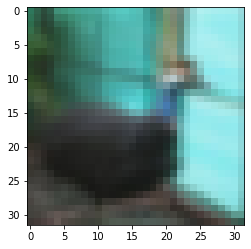

In [11]:
# mnist: (60000, ) -> [5, 2, 1, 0.......]
# cifar10: (50000, 1) -> [[5], [2], [1], [0].......] 
import matplotlib.pyplot as plt
import random

# 從train.shape知道總共有50000筆資料，所以隨機整數範圍是(0~49999)
idx = random.randint(0, 49999)

# 因為y_train 會印出list含list，為了取到最裡面 list 的單一值所以加上[0]
ans = y_train[idx][0]

# 可以印出對應的字串答案
print(names[ans])

# 可以show出對應訓練的圖片
plt.imshow(x_train[idx])

In [15]:
# from tensorflow.keras.models import Sequential
# # ConV1D: 樂譜、ConV2D:照片、Conv3D:3D照片
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.layers import Dense, Flatten
# # keras conv2d API: https://keras.io/zh/layers/convolutional/
# # maxpooling 2D API: https://keras.io/zh/layers/pooling/
# layers = [
#     Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
#     MaxPooling2D(),
#     Conv2D(128, 3, activation="relu", padding="same"),
#     MaxPooling2D(),
#     Conv2D(256, 3, activation="relu", padding="same"),
#     MaxPooling2D(),
#     Flatten,
#     Dense(128, activation="relu"),
#     Dense(10, activation="softmax")
# ]
# model = Sequential(layers)
# model.summary

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 3(width)*3(length)*3(channel)=27  
    # Param = 27*64(組filter)+64(bias, 每組filter有一個及格分數)=1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)), 
    MaxPooling2D(),

    # 3(width) * 3(length) * 64(channel) = 576  
    # Param = 576 * 128(組filter) + 128(bias, 每組filter有一個及格分數) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    
    # 3(width) * 3(length) * 128(channel) = 1152  
    # Param = 1152 * 256(組filter) + 256(bias, 每組filter有一個及格分數) = 295168
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [18]:
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.optimizers import Adam
# model.compile(loss=SparseCategoricalCrossentropy(),
#               optimizer=Adam(),
#               metrics=["accuracy"])

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss = SparseCategoricalCrossentropy,
             optimizer = Adam(),
             metrics=["accuracy"])

In [19]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100


TypeError: ignored

In [ ]:
model.evaluate(x_test_norm, y_test)